In [1]:
import sys

PACKAGE_PARENT = '../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.agents.RL.policygrad.torch.ppo import PPOAgent
import pposp_configs as PPOCONFIGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load configurations
CONST = PPOCONFIGS.CONST
agent_config = PPOCONFIGS.agent_config
env = PPOCONFIGS.env

In [23]:
from alphaslime.evaluate.eval_agents import EvaluateGameSA

# create agent
agent_trained = PPOAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
paths = ['../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.43_model_actor.pt', '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.43_model_critic.pt']
# paths = ['../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.32_model_actor.pt', '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.32_model_critic.pt']
# paths = ['../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.28_model_actor.pt', '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.28_model_critic.pt']
# paths = ['../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_actor.pt', '../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_critic.pt']
agent_trained.load_model(paths)


eps = 1000
base_dir_path = "./"
RENDER = False
gym_evaluator = EvaluateGameSA(agent_trained, env, base_dir_path, render=RENDER)
running_avg_len = 100
# running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len, save=False)




Actor Device used: cpu
Critic Device used: cpu
... loading models ...


100%|██████████| 1000/1000 [14:57<00:00,  1.11it/s]


average reward per episode : -4.308
average reward per episode= -4.308


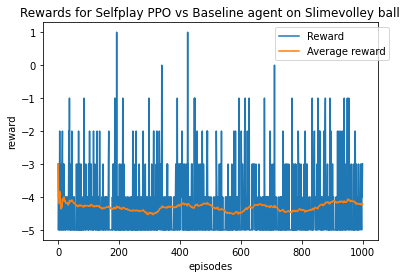

In [9]:
print("average reward per episode :", sum(rewards) / len(rewards))

import numpy as np
import matplotlib.pyplot as plt

rewards = np.array(rewards)
plt.plot(rewards, label='Reward')
plt.plot(avg_rewards_array, label='Average reward')
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.xlabel('episodes')
plt.ylabel('reward')
plt.title('Rewards for Selfplay PPO vs Baseline agent on Slimevolley ball')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()

In [8]:
# load training data

import pickle

data_path_1 = '../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_data.pkl'
data_path_2 = '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.28_data.pkl'
data_path_3 = '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.32_data.pkl'
data_path_4 = '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.53_data.pkl'
data_path_5 = '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.43_data.pkl'
with open(data_path_1, 'rb') as f:
    data1 = pickle.load(f)
with open(data_path_2, 'rb') as f:
    data2 = pickle.load(f)
with open(data_path_3, 'rb') as f:
    data3 = pickle.load(f)
with open(data_path_4, 'rb') as f:
    data4 = pickle.load(f)
with open(data_path_5, 'rb') as f:
    data5 = pickle.load(f)

train_rewards_1 = data1['rewards']
train_rewards_2 = data2['rewards']
train_rewards_3 = data3['rewards']
train_rewards_4 = data4['rewards']
train_rewards_5 = data5['rewards']
train_rewards = []
train_rewards.extend(train_rewards_1)
train_rewards.extend(train_rewards_2)
train_rewards.extend(train_rewards_3)
train_rewards.extend(train_rewards_4)
train_rewards.extend(train_rewards_5)


train_avg_rewards_1 = data1['avg_rewards']
train_avg_rewards_2 = data2['avg_rewards']
train_avg_rewards_3 = data3['avg_rewards']
train_avg_rewards_4 = data3['avg_rewards']
train_avg_rewards_5 = data3['avg_rewards']
train_avg_rewards = []
train_avg_rewards.extend(train_avg_rewards_1)
train_avg_rewards.extend(train_avg_rewards_2)
train_avg_rewards.extend(train_avg_rewards_3)
train_avg_rewards.extend(train_avg_rewards_4)
train_avg_rewards.extend(train_avg_rewards_5)

4.32
average reward per episode= 3.667375


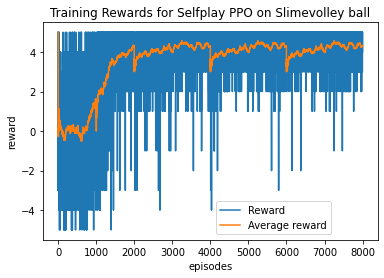

In [22]:
print(train_avg_rewards[-1])
train_rewards = np.array(train_rewards)
plt.plot(train_rewards, label='Reward')
plt.plot(train_avg_rewards, label='Average reward')
plt.title('Training Rewards for Selfplay PPO on Slimevolley ball')
# plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.legend(bbox_to_anchor=(.875, .2)) 
plt.xlabel('episodes')
plt.ylabel('reward')
print('average reward per episode= {}'.format(np.mean(train_rewards)))
plt.show()

In [4]:
# Selfplay VS Selfplay
from alphaslime.evaluate.eval_agents import EvaluateGameMA

agent_right = PPOAgent(CONSTANTS=CONST, config=agent_config)
agent_left = PPOAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
paths_right = ['../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.43_model_actor.pt', '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.43_model_critic.pt']
# paths_right = ['../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.32_model_actor.pt', '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.32_model_critic.pt']
paths_left = ['../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.28_model_actor.pt', '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.28_model_critic.pt']
# paths = ['../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.28_model_actor.pt', '../../../PPO_data_cont/gamma_0.99_alpha_0.0003_reward_4.28_model_critic.pt']
# paths = ['../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_actor.pt', '../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_critic.pt']
agent_right.load_model(paths_right)
agent_left.load_model(paths_left)


eps = 10
base_dir_path = "./"
RENDER = False
gym_evaluator = EvaluateGameMA(agent_right, agent_left, env, base_dir_path, render=RENDER, time_delay=0)
running_avg_len = 100
# running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len)



Actor Device used: cpu
Critic Device used: cpu
Actor Device used: cpu
Critic Device used: cpu
... loading models ...
... loading models ...


100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


3
average reward per episode= 0.4


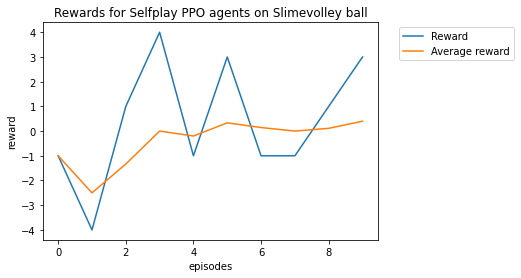

In [5]:
print(rewards[-1])
rewards = np.array(rewards)
plt.plot(rewards, label='Reward')
plt.plot(avg_rewards_array, label='Average reward')
plt.title('Rewards for Selfplay PPO agents on Slimevolley ball')
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.xlabel('episodes')
plt.ylabel('reward')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()